# Julie Flament



## Research question/interests
**How does a lack of resources due to low wealth affect the literacy rate?**
# Briefly describe your research question or interests here.
To answer my question, I will compare three levels of wealth: rich, middle-class, and poor. I will use the wealth column in our data set that classifies each individual into a specific quintile (1-5). I will presumably use a bar graph with three bars representing the different wealth levels. A bar graph will highlight the differences in literacy rates due to the unequal distribution of wealth.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import project_function2 as pf

#data = pd.read_csv("../data/raw/dataset_raw.csv",low_memory=False)
#data

In [4]:
dataset = pf.set_data("../data/raw/dataset_raw.csv")

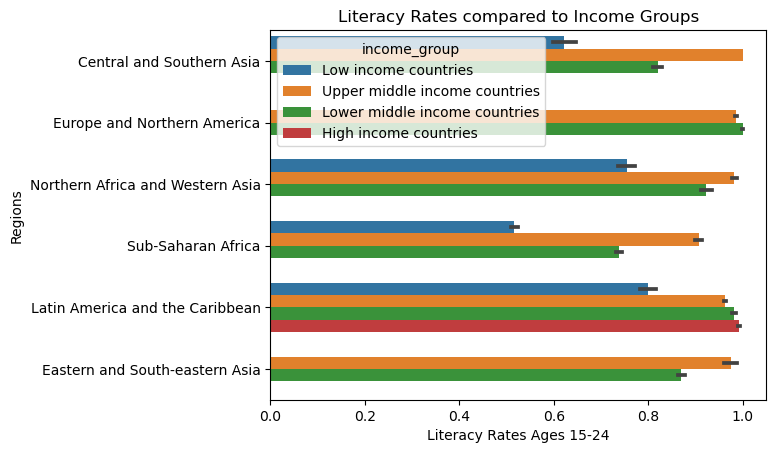

In [5]:
pf.barplot(dataset)

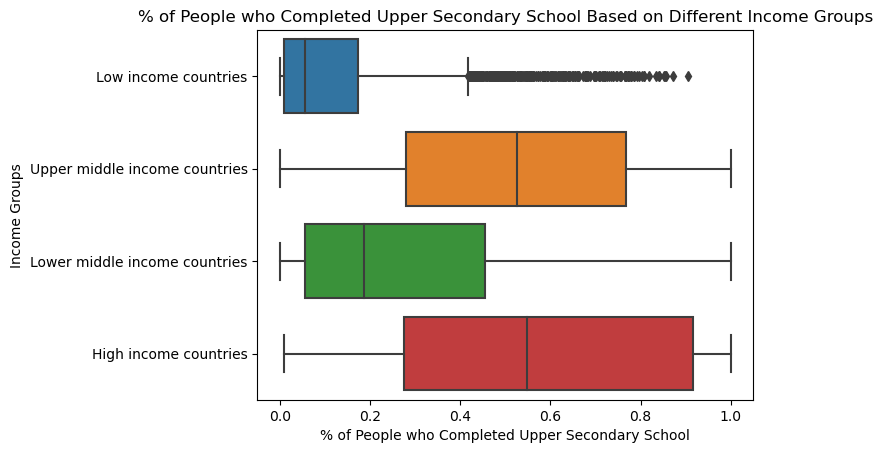

In [6]:
pf.boxplot_UpSec(dataset)

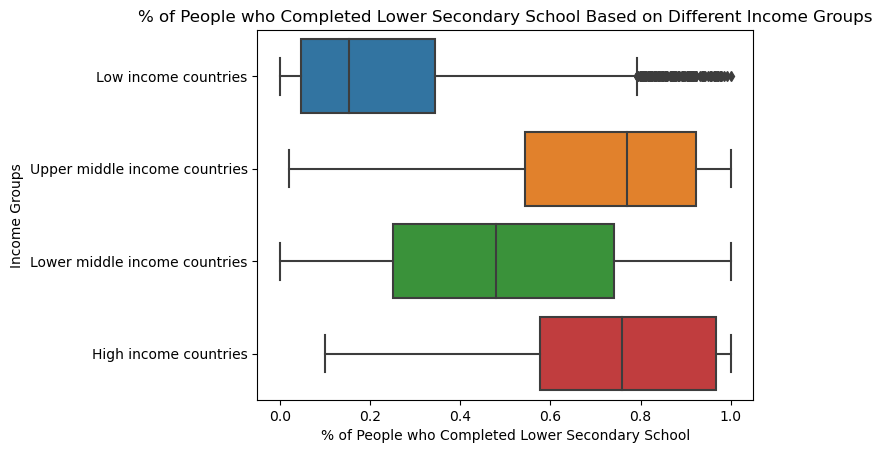

In [7]:
pf.boxplot_LoSec(dataset)


In [9]:
pf.boxplot_Pri(dataset)

NameError: name 'dataset2' is not defined

In [10]:
pf.violinplot(dataset)
#plot5 = sns.violinplot(data=dataset2, x="literacy_1524_m", y="income_group", hue="Sex", split=True).set(title = "Literacy Rates (Ages 15-25) Across Different Income Groups Based on Sex", xlabel = "Literacy Rates (Ages 15-24)", ylabel = "Income Groups")




NameError: name 'dataset2' is not defined

## Research question/interests
**Does gender affect how wealth impacts literacy rates around the world?**
Are there countries where being wealthier results in only one gender having higher literacy rates?


My plan is to create a new plots that specifically compare wealth and gender. Now that I compared wealth to region, I can compare it to gender which will provide me with even more insight on how wealth affect literacy rates. I plan on continuing to use the literacy_1524_m and literacy_1527_no columns to provide data. I also now plan to use the column Gender. I will create several bar plots each comparing Gender and Wealth. Finally, I will create a FaceGrid plot to compare income_groups with gender.

### Notes regarding the data collected above

- countries in Latin-American and the Caribbean have higher literacy rates throughout most of the Quintiles. Why does wealth have a lesser impact on literacy rates in those regions?
- countries in Sub-Saharan Africa have an overall lower literacy rates no matter the quintile. However, the higher the quintile, the more there are a few countries in Sub-Saharan Africa that have a higher literacy rate. Wealth clearly has an effect on the literacy rates in this region. 
- Central and Southern Asian countries have higher literacy rates (only in quintile 3-5) than other countries 

